In [1]:
import h5py
import pandas as pd
import numpy as np
from operator import itemgetter
import seaborn as sns
import matplotlib.pyplot as plt 
cagi_result = h5py.File('./cagi_gpn.h5', 'r')
llr = cagi_result['llr'][()]

In [2]:
cagi_df = pd.read_csv('../../data/CAGI/final_cagi_metadata.csv',
                      index_col=0).reset_index()
exp_list = cagi_df['8'].unique()

In [4]:
cagi_df['8'].unique()

0         HBB
1         HBB
2         HBB
3         HBB
4         HBB
         ... 
18437    LDLR
18438    LDLR
18439    LDLR
18440    LDLR
18441    LDLR
Name: 8, Length: 18442, dtype: object

/tmp/ipykernel_3487308/1734688880.py:20: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig2=plt.figure(figsize = (20,2))


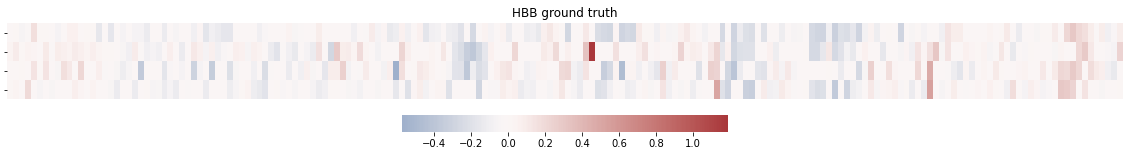

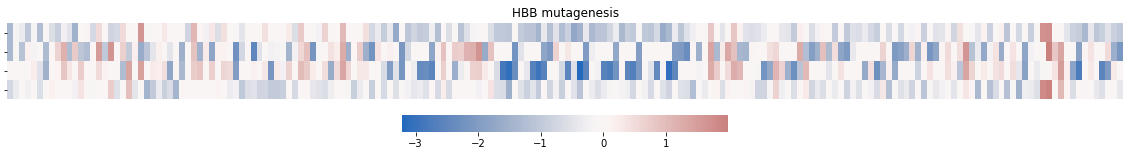

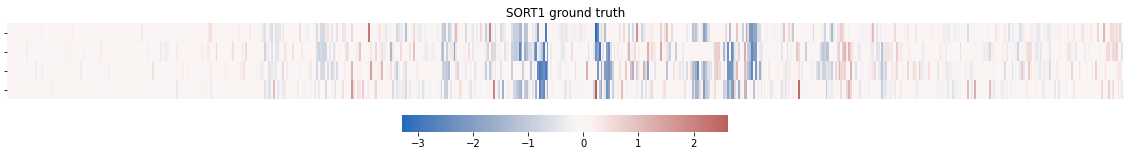

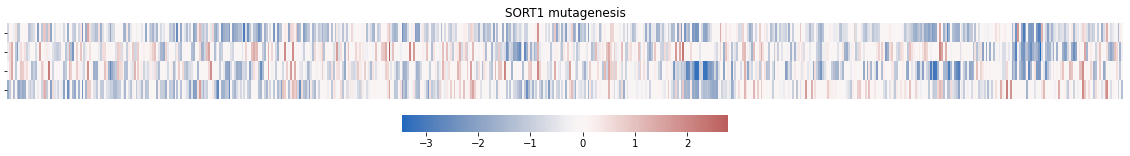

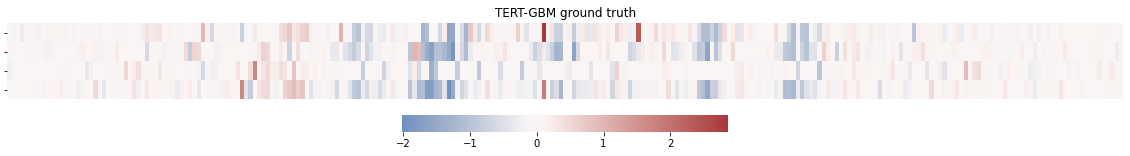

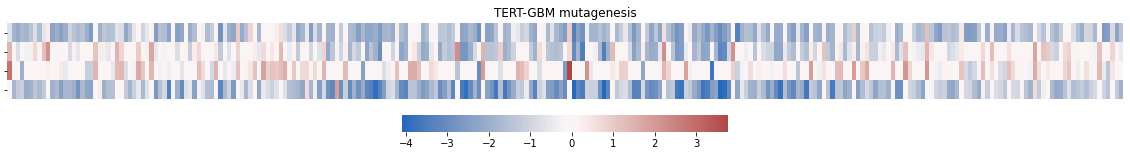

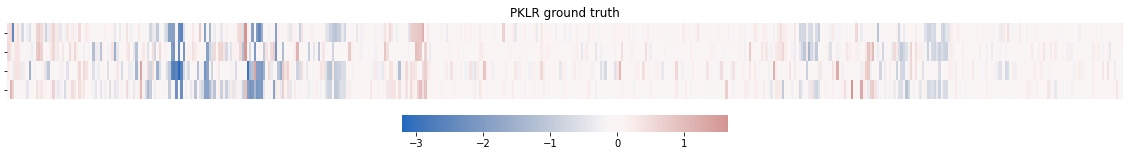

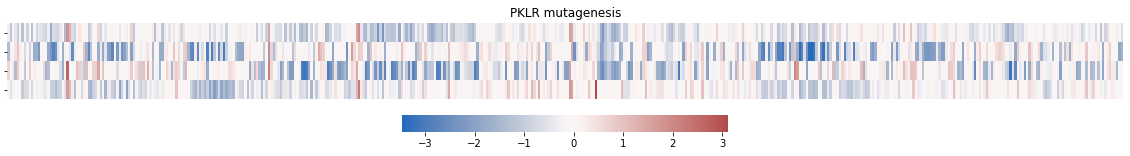

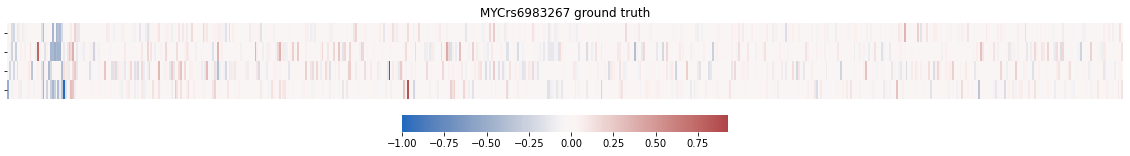

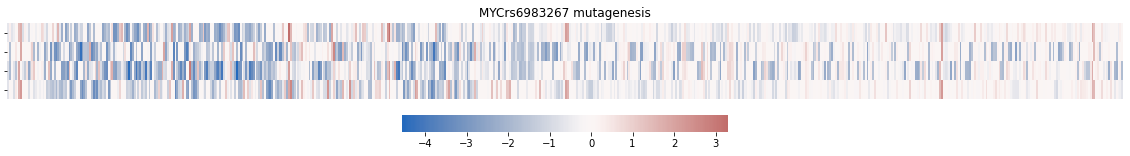

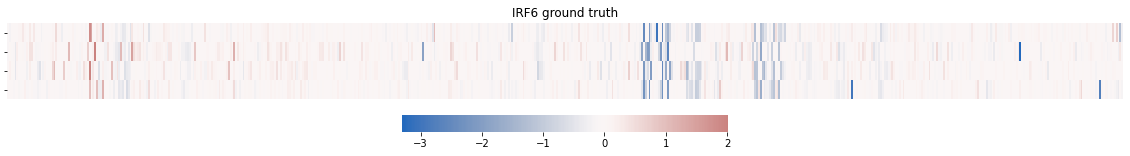

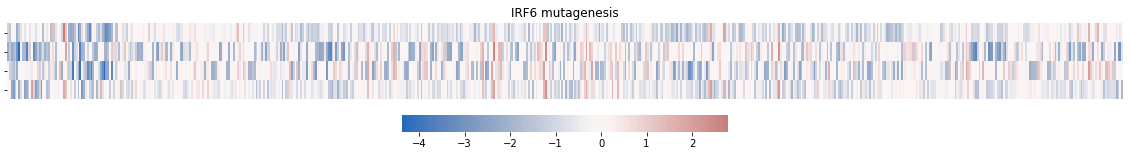

In [3]:
idx = {'A':0,'C':1,'G':2,'T':3}
for exp in exp_list:
    exp_df = cagi_df[cagi_df['8']==exp]
    idx_df = exp_df[['0','1','2']].drop_duplicates().sort_values(by=['1'])
    exp_len = len(exp_df['1'].unique())
    effect_size = np.zeros((4,exp_len))
    predict_size = np.zeros((4,exp_len))
    
    for pos in range(0,exp_len):
        row = idx_df.iloc[pos]
        loci_df = exp_df[(exp_df['0']==row['0'])&(exp_df['1']==row['1'])&(exp_df['2']==row['2'])]
        loci_idx = loci_df.index
        ref_allele = loci_df['3'].drop_duplicates().values
        alt_allele = loci_df['4'].values.tolist()
        diff = loci_df['6'].values

        effect_size[itemgetter(*alt_allele)(idx),pos] =diff
        predict_size [itemgetter(*alt_allele)(idx),pos] =llr[loci_idx]

    fig2=plt.figure(figsize = (20,2))
    ax = sns.heatmap(effect_size,cmap = 'vlag',
                        center = 0,
                        #annot = exp_annot,fmt = '',
                    cbar_kws = dict(use_gridspec=False,location="bottom"));
    ax.tick_params(left=True, bottom=False);
    #ax.set_yticklabels(['A','C','G','T'],size = 1);
    ax.set_yticklabels([])
    ax.set_xticklabels([]);
    ax.set_title(exp+' ground truth')
    #plt.tight_layout()

    fig3=plt.figure(figsize = (20,2))
    ax = sns.heatmap(predict_size,cmap = 'vlag',
                        center = 0,
                        #annot = pred_annot,fmt = '',
                        cbar_kws = dict(use_gridspec=False,location="bottom"));
    ax.tick_params(left=True, bottom=False);
    #ax.set_yticklabels(['A','C','G','T'],size = 1);
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.set_title(exp+' mutagenesis')
